In [30]:
## DATASET DESCRIPTION
#Dataset description is a summary or documentation that provides important information about a dataset.
# methods like df.describe() can be used to describe the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('NVDA.csv')

In [3]:
print(df.describe)

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2000-01-03    0.984375    0.992188    0.919271    0.975260    0.894608   
1     2000-01-04    0.958333    0.960938    0.901042    0.949219    0.870721   
2     2000-01-05    0.921875    0.937500    0.904948    0.917969    0.842055   
3     2000-01-06    0.917969    0.917969    0.822917    0.858073    0.787112   
4     2000-01-07    0.854167    0.881510    0.841146    0.872396    0.800251   
...          ...         ...         ...         ...         ...         ...   
6111  2024-04-18  849.700012  861.900024  824.020020  846.710022  846.710022   
6112  2024-04-19  831.500000  843.239990  756.059998  762.000000  762.000000   
6113  2024-04-22  781.039978  800.729980  764.000000  795.179993  795.179993   
6114  2024-04-23  807.690002  827.690002  802.640015  824.229980  824.229980   
6115  2024-04-24  839.500000  840.820007  791.830017  796.770020  796.770020   

     

In [6]:
print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2000-01-03  0.984375  0.992188  0.919271  0.975260   0.894608  30091200
1  2000-01-04  0.958333  0.960938  0.901042  0.949219   0.870721  30048000
2  2000-01-05  0.921875  0.937500  0.904948  0.917969   0.842055  18835200
3  2000-01-06  0.917969  0.917969  0.822917  0.858073   0.787112  12048000
4  2000-01-07  0.854167  0.881510  0.841146  0.872396   0.800251   7118400


In [35]:
## PREPROCESSING
#Handling Missing Values:
#Identify missing values in the dataset. Decide whether to remove rows with missing values, impute them (replace missing values with a statistical measure such as mean, median, or mode),
#or use more advanced imputation techniques like k-nearest neighbors or predictive modeling.

##Handling Duplicate Records:

#Check for duplicate records in the dataset.Decide whether to remove duplicates based on certain criteria or keep them if they represent valid and distinct observations.
##Data Cleaning:

#Remove irrelevant or redundant columns that do not contribute to the analysis. Standardize or normalize data if necessary to bring all features to a similar scale.
#Correct any errors or inconsistencies in the data (e.g., typos, formatting issues).


##Handling Categorical Variables:

#Convert categorical variables into a numerical format using techniques like one-hot encoding or label encoding,
#depending on the nature of the data and the machine learning algorithms to be used.

In [8]:
from sklearn.preprocessing import MinMaxScaler

df = df.drop_duplicates()

In [9]:
# assuming adj close is redundant
if 'Adj Close' in df.columns:
    df.drop('Adj Close', axis=1, inplace=True)

# handling missing values
columns_to_process = ['Open', 'High', 'Low', 'Close', 'Volume']
df[columns_to_process] = df[columns_to_process].fillna(df[columns_to_process].mean())

# normalizing selected columns
scaler = MinMaxScaler()
df[columns_to_process] = scaler.fit_transform(df[columns_to_process])

print("\nUpdated Summary: ")
print(df.describe())


Updated Summary: 
              Open         High          Low        Close       Volume
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000
mean      0.054749     0.054822     0.055037     0.055246     0.062769
std       0.126597     0.126804     0.127164     0.127641     0.046996
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.002455     0.002436     0.002434     0.002461     0.034397
50%       0.004255     0.004203     0.004290     0.004285     0.051711
75%       0.043317     0.043139     0.043767     0.043699     0.076308
max       1.000000     1.000000     1.000000     1.000000     1.000000


In [10]:
## DECISION TREE
#Decision trees are a popular type of supervised machine learning algorithm used for both classification and regression tasks.
#They are versatile, easy to understand, and can handle both numerical and categorical data.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

df = pd.read_csv('NVDA.csv')

# Date isnt an appropriate column for application
features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Define feature columns

# target
target_variable = 'Close'

# splitting dataset
X = df[features]
y = df[target_variable]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DTC regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# predictions
y_pred = regressor.predict(X_test)

# Evaluate the regressor using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

R-squared Score: 1.00


In [34]:
#HANDLIING OF CATEGORICAL VARIABLES: ONE HOT ENCODING

In [14]:
categorical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Print the encoded dataset
print(df_encoded.head())

         Date  Adj Close  Open_0.608333  Open_0.616667  Open_0.666667  \
0  2000-01-03   0.894608          False          False          False   
1  2000-01-04   0.870721          False          False          False   
2  2000-01-05   0.842055          False          False          False   
3  2000-01-06   0.787112          False          False          False   
4  2000-01-07   0.800251          False          False          False   

   Open_0.669167  Open_0.670833  Open_0.710833  Open_0.7125  Open_0.719167  \
0          False          False          False        False          False   
1          False          False          False        False          False   
2          False          False          False        False          False   
3          False          False          False        False          False   
4          False          False          False        False          False   

   ...  Volume_376758000  Volume_379890000  Volume_384901200  \
0  ...             False    

In [36]:
## ASSOCIATION RULE

#Association rule learning is a rule-based machine learning method used to discover interesting relationships or associations between
#variables in large datasets. It's commonly used in market basket analysis to identify patterns in consumer behavior, such as which products
#are frequently purchased together.

#The most well-known algorithm for association rule learning is the Apriori algorithm.

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)

# numerical to categorical val
df_bin = df.apply(lambda x: pd.qcut(x, q=4, duplicates='drop', labels=False))
frequent_itemsets = apriori(df_bin, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Association Rules:")
print(rules)

C:\Users\91808\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [17]:
## DATA ANALYSIS
#Data analysis is the process of inspecting, cleaning, transforming, and modeling data with the goal of discovering useful information,
#informing conclusions, and supporting decision-making. It involves a variety of techniques and methods to extract insights and meaning from datasets,
#often with the aid of specialized software tools or programming languages like Python or R.



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6116 non-null   float64
 1   High       6116 non-null   float64
 2   Low        6116 non-null   float64
 3   Close      6116 non-null   float64
 4   Adj Close  6116 non-null   float64
 5   Volume     6116 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 286.8 KB
None

Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000   
mean     53.052266    54.017201    52.031700    53.064741    52.794253   
std     121.267334   123.423982   118.835114   121.183234   121.214864   
min       0.608333     0.656667     0.600000     0.614167     0.563377   
25%       2.959688     3.027500     2.875000     2.950391     2.707880   
50%       4.683750     4.74

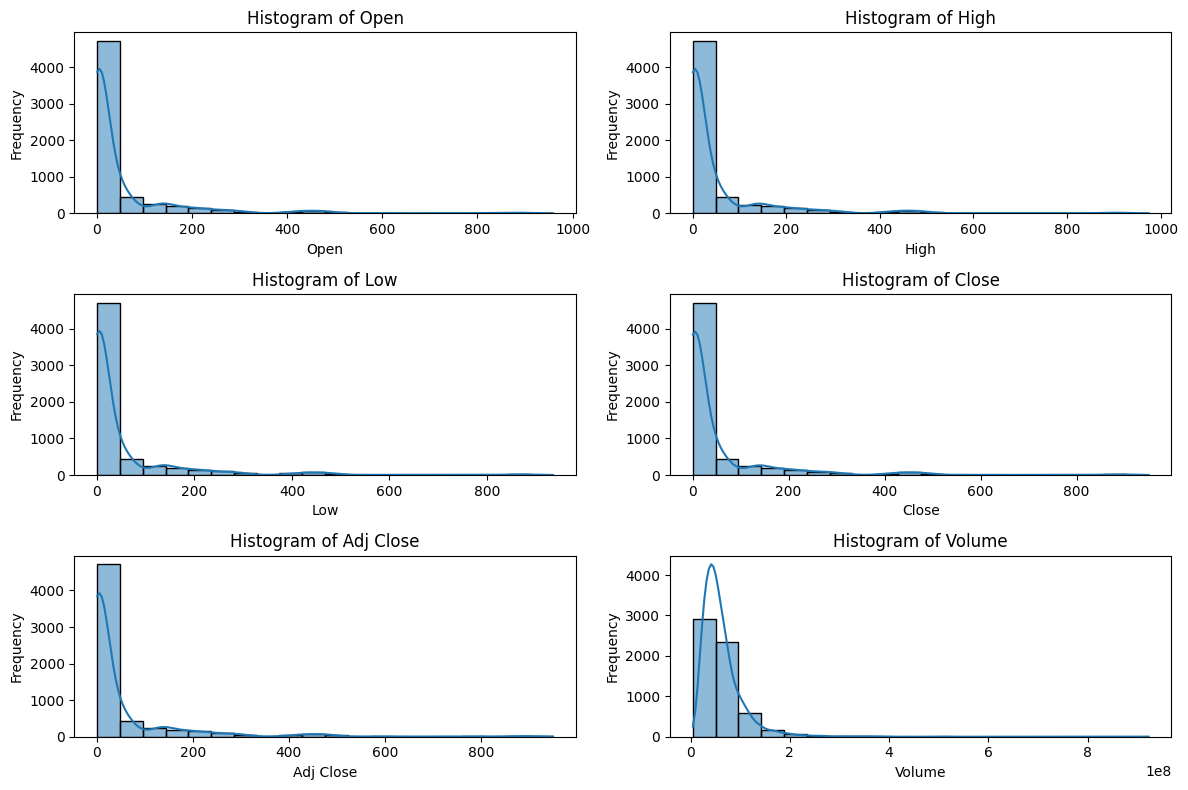

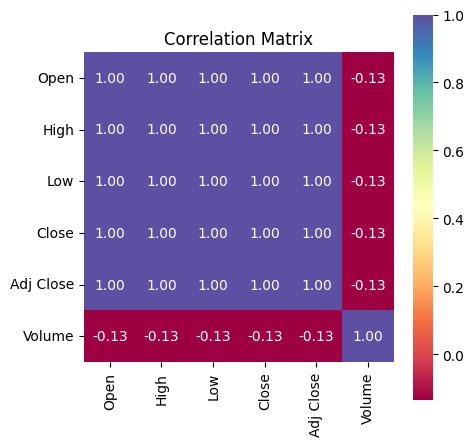

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)

print("Dataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())


plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# P (correlation matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [37]:
## REGRESSION MODEL (LINEAR REGRESSION)
#Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the target variable) 
#and one or more independent variables (also known as predictor variables). 
#It assumes a linear relationship between the independent variables and the dependent variable.

#In simple linear regression, there is only one independent variable, whereas in multiple linear regression, there are multiple independent variables.



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)
X = df.drop('Close', axis=1)  # Use all columns except 'Close' as features
y = df['Close']  # Target variable is 'Close'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")



Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.0192
Root Mean Squared Error (RMSE): 0.1386
R-squared Score (R2): 1.0000


In [27]:
## TIME SERIES ANALYSIS
#Time series analysis is a statistical technique used to analyze data collected or recorded over time. It involves studying the patterns, trends,
#and relationships within the data to make predictions or derive insights about future behavior.
#Time series analysis is widely used in various fields, including finance, economics, meteorology, engineering, and healthcare, to make
#informed decisions, predict future trends, and understand the dynamics of complex systems over time.

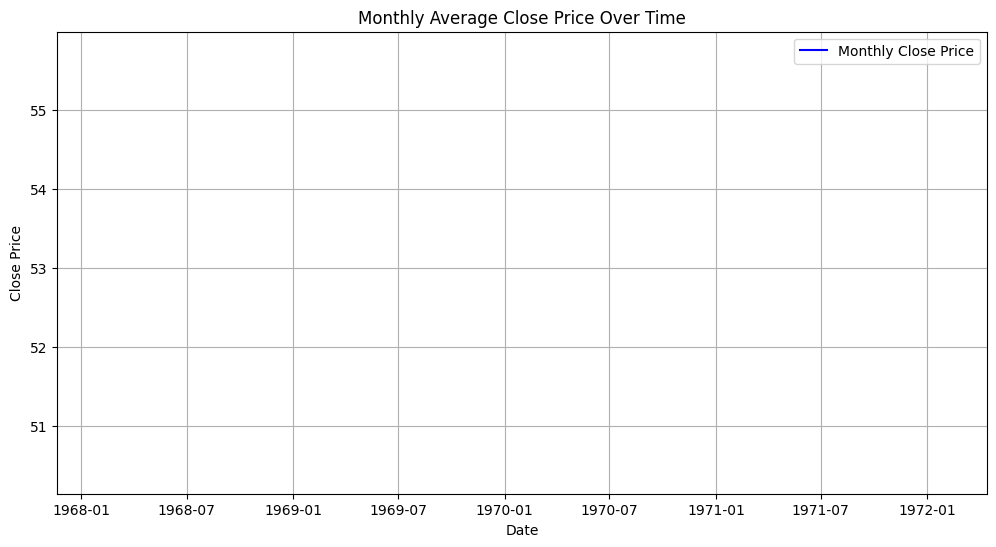

ValueError: x must have 2 complete cycles requires 24 observations. x only has 1 observation(s)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


df = pd.read_csv('NVDA.csv')
df = df.drop('Date', axis=1)

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

df = df.dropna()
df.index = pd.to_datetime(df.index)

df_resampled = df.resample('M').mean()  # Monthly mean closing prices

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Close'], label='Monthly Close Price', color='blue')
plt.title('Monthly Average Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
decomposition = sm.tsa.seasonal_decompose(df_resampled['Close'], model='additive', period=12)  # Assuming yearly seasonality
decomposition.plot()
plt.suptitle('Time Series Decomposition')
plt.show()